In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import healpy as hp
from rubin_sim.data import get_baseline, get_data_dir
import rubin_sim.maf as maf

In [2]:
opsdb_file = get_baseline()
runName = os.path.split(opsdb_file)[-1].replace('.db', '')
print(runName)

baseline_v2.0_10yrs


In [3]:
# Demo the map 
# (not necessary for use with just the metrics - see below. This is just to demonstrate the slicepoint info)

cols = ['fieldRA', 'fieldDec', 'filter', 'observationStartMJD', 'visitExposureTime', 'fiveSigmaDepth', 'rotSkyPos']
simdata = maf.getSimData(opsdb_file, 'night <= 365*2', cols)
simdata[0:10]

rec.array([(310.0244801 , -60.81292802, 'y', 60218.00180556, 30., 22.3705568 , 62.75077469),
           (310.60187065, -63.56142457, 'y', 60218.00225414, 30., 22.33832685, 61.08425006),
           (311.2926113 , -66.31777378, 'y', 60218.00270279, 30., 22.29548686, 60.72618943),
           (312.1407313 , -69.08266621, 'y', 60218.00315152, 30., 21.27042123, 60.65678092),
           (304.17016259, -73.37544181, 'y', 60218.00362374, 30., 21.20527555, 49.09553663),
           (304.26955796, -70.56522163, 'y', 60218.00407267, 30., 21.26477096, 49.29742126),
           (310.0244801 , -60.81292802, 'y', 60218.00495938, 30., 21.40744224, 60.11341545),
           (310.60187065, -63.56142457, 'y', 60218.00540803, 30., 21.37457286, 59.34346652),
           (311.2926113 , -66.31777378, 'y', 60218.00585674, 30., 21.45500171, 59.0939424 ),
           (312.1407313 , -69.08266621, 'y', 60218.00630551, 30., 21.40615147, 59.1181414 )],
          dtype=[('fieldRA', '<f8'), ('fieldDec', '<f8'), ('filter', 

In [4]:
slicer = maf.HealpixSlicer(nside=64)
slicer.setupSlicer(simdata)
print(f'original slicepoint keys are {slicer.slicePoints.keys()}')

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
original slicepoint keys are dict_keys(['sid', 'ra', 'dec', 'nside', 'gall', 'galb'])


In [5]:
galmap = maf.GalacticPlanePriorityMap()
sp = galmap.run(slicer.slicePoints)

Read galplane priority map from /Users/lynnej/rubin_sim_data/maps/GalacticPlanePriorityMaps/priority_galPlane_footprint_map_data_u.fits
Read galplane priority map from /Users/lynnej/rubin_sim_data/maps/GalacticPlanePriorityMaps/priority_galPlane_footprint_map_data_g.fits
Read galplane priority map from /Users/lynnej/rubin_sim_data/maps/GalacticPlanePriorityMaps/priority_galPlane_footprint_map_data_r.fits
Read galplane priority map from /Users/lynnej/rubin_sim_data/maps/GalacticPlanePriorityMaps/priority_galPlane_footprint_map_data_i.fits
Read galplane priority map from /Users/lynnej/rubin_sim_data/maps/GalacticPlanePriorityMaps/priority_galPlane_footprint_map_data_z.fits
Read galplane priority map from /Users/lynnej/rubin_sim_data/maps/GalacticPlanePriorityMaps/priority_galPlane_footprint_map_data_y.fits
Read galplane priority map from /Users/lynnej/rubin_sim_data/maps/GalacticPlanePriorityMaps/priority_galPlane_footprint_map_data_sum.fits


In [6]:
# We have to make a slicePoint key for each galactic plane map component .. 
print(f'new slicepoint keys are {sp.keys()}')

new slicepoint keys are dict_keys(['sid', 'ra', 'dec', 'nside', 'gall', 'galb', 'galplane_priority_zucker_sfr_map:u', 'galplane_priority_open_clusters_map:u', 'galplane_priority_clementini_stellarpops_map:u', 'galplane_priority_magellenic_clouds_map:u', 'galplane_priority_bonito_sfr_map:u', 'galplane_priority_pencilbeams_map:u', 'galplane_priority_xray_binaries_map:u', 'galplane_priority_globular_clusters_map:u', 'galplane_priority_galactic_plane_map:u', 'galplane_priority_galactic_bulge_map:u', 'galplane_priority_combined_map:u', 'galplane_priority_zucker_sfr_map:g', 'galplane_priority_open_clusters_map:g', 'galplane_priority_clementini_stellarpops_map:g', 'galplane_priority_magellenic_clouds_map:g', 'galplane_priority_bonito_sfr_map:g', 'galplane_priority_pencilbeams_map:g', 'galplane_priority_xray_binaries_map:g', 'galplane_priority_globular_clusters_map:g', 'galplane_priority_galactic_plane_map:g', 'galplane_priority_galactic_bulge_map:g', 'galplane_priority_combined_map:g', 'galpl

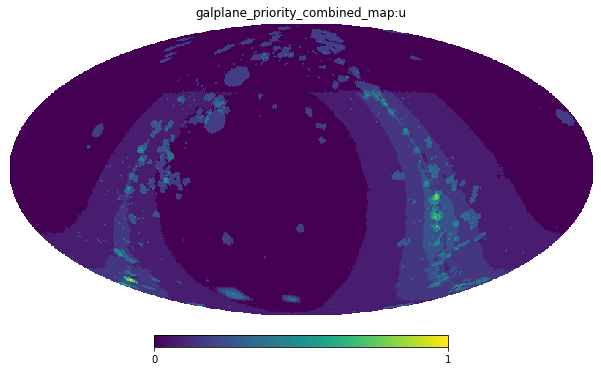

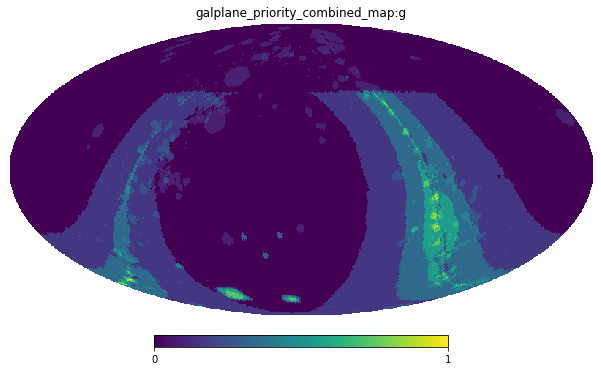

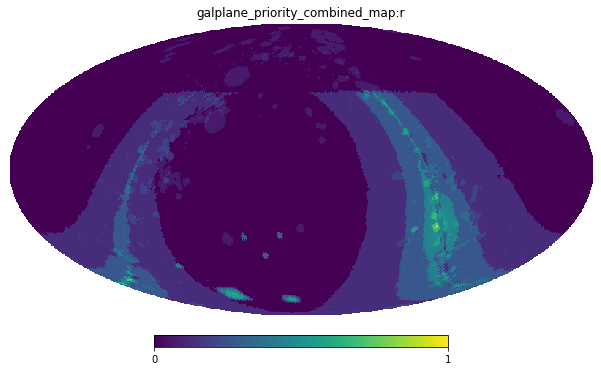

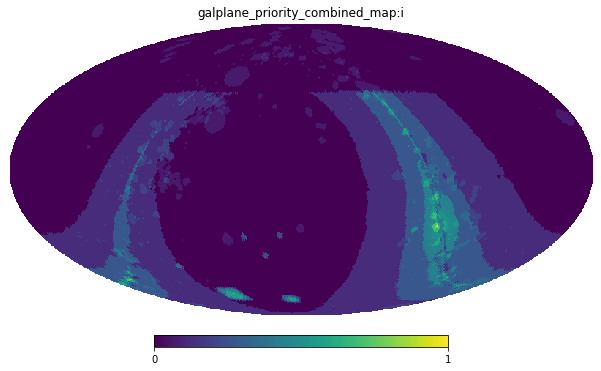

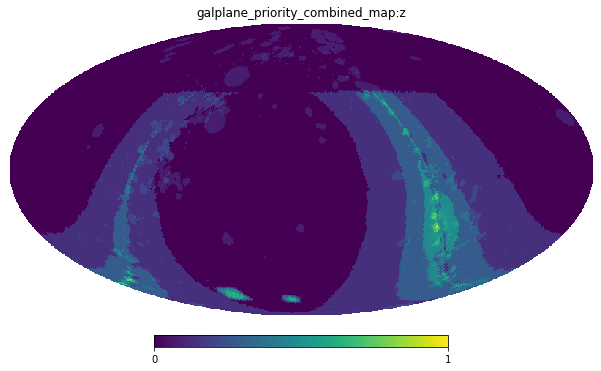

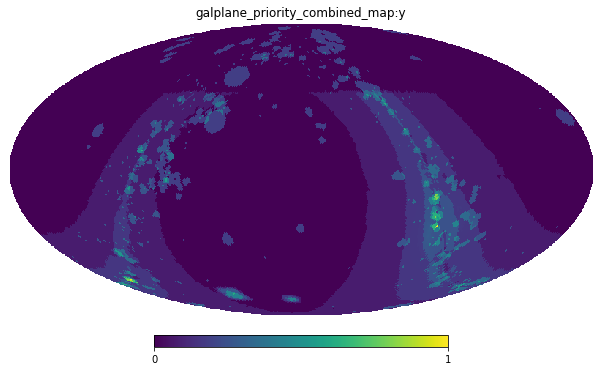

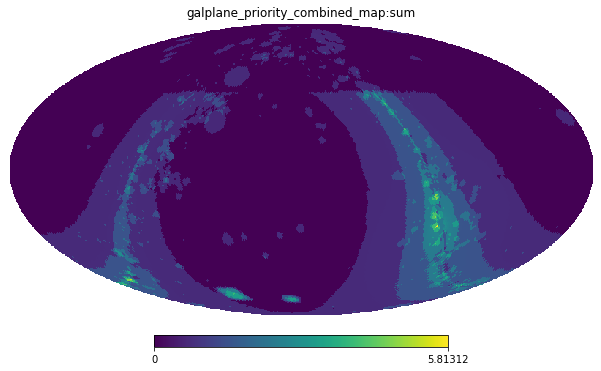

In [7]:
for key in [k for k in sp.keys() if 'galplane_priority' in k and 'combined' in k]:
    hp.mollview(sp[key], min=0, title=key)

In [8]:
# Okay and let's check a thing -- we've got these maps bundled up. 
# Does the slicepoint really access the correct point?
# Pick a point in the plane
idx = maf.radec2pix(ra=np.radians(250), dec=np.radians(-40), nside=64)
print(idx)
slicer[idx]['slicePoint']

40497


{'sid': 40497,
 'ra': 4.356505437595221,
 'dec': -0.7021142756051657,
 'nside': 64,
 'gall': 5.982230859344304,
 'galb': 0.0781489930402135,
 'galplane_priority_zucker_sfr_map:u': 0.0,
 'galplane_priority_open_clusters_map:u': 0.0,
 'galplane_priority_clementini_stellarpops_map:u': 0.0,
 'galplane_priority_magellenic_clouds_map:u': 0.0,
 'galplane_priority_bonito_sfr_map:u': 0.0,
 'galplane_priority_pencilbeams_map:u': 0.0,
 'galplane_priority_xray_binaries_map:u': 2.7729018e-05,
 'galplane_priority_globular_clusters_map:u': 0.0,
 'galplane_priority_galactic_plane_map:u': 0.135,
 'galplane_priority_galactic_bulge_map:u': 0.0,
 'galplane_priority_combined_map:u': 0.25237477,
 'galplane_priority_zucker_sfr_map:g': 0.0,
 'galplane_priority_open_clusters_map:g': 0.0,
 'galplane_priority_clementini_stellarpops_map:g': 0.0,
 'galplane_priority_magellenic_clouds_map:g': 0.0,
 'galplane_priority_bonito_sfr_map:g': 0.0,
 'galplane_priority_pencilbeams_map:g': 0.0,
 'galplane_priority_xray_binar

In [9]:
# Okay, let's move along to the metrics themselves

footprint_summaries = [maf.SumMetric()]
footprint_plotdicts = {'percentileClip': 95}
filter_summaries = [maf.MeanMetric(), maf.MedianMetric(), maf.RmsMetric(),
                   maf.AreaThresholdMetric(lower_threshold=0.8)]
filter_plotdicts = {'colorMin': 0, 'colorMax': 2, 'xMin': 0, 'xMax': 5}
timescale_summaries = [maf.SumMetric(), maf.MedianMetric(), 
                       maf.AreaThresholdMetric(lower_threshold=0.5)]
timescale_plotdicts = {'colorMin': 0, 'colorMax': 1, 'xMin': 0, 'xMax': 1}

science_maps = [s.replace('galplane_priority_', '').split(":")[0] for s in galmap.keynames if 'sum' in s]

slicer = maf.HealpixSlicer(nside=64, useCache=False)
sql = None
bundles = {}
for m in science_maps:
    footprintmetric = maf.GalPlaneFootprintMetric(science_map = m)
    bundles[f'{m} footprint'] = maf.MetricBundle(footprintmetric, slicer, sql,
                                                 plotDict=footprint_plotdicts,
                                                 runName=runName, summaryMetrics=footprint_summaries)
    filtermetric = maf.GalPlaneTimePerFilterMetric(science_map = m)
    bundles[f'{m} filter'] = maf.MetricBundle(filtermetric, slicer, sql,
                                              plotDict=filter_plotdicts,
                                              runName=runName, summaryMetrics=filter_summaries)
    visit_timescalesmetric = maf.GalPlaneVisitIntervalsTimescaleMetric(science_map=m)
    bundles[f'{m} visit intervals'] = maf.MetricBundle(visit_timescalesmetric, slicer, sql,
                                                       plotDict=timescale_plotdicts,
                                                       runName=runName, summaryMetrics=timescale_summaries)
    season_timescalemetric = maf.GalPlaneSeasonGapsTimescaleMetric(science_map=m)
    bundles[f'{m} season gaps'] = maf.MetricBundle(season_timescalemetric, slicer, sql,
                                                   plotDict=timescale_plotdicts,
                                                   runName=runName, summaryMetrics=timescale_summaries)

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


In [10]:
!/bin/rm galplane_test/*
outDir = 'galplane_baseline_v2.0_10yrs'
resultsDb = maf.ResultsDb(outDir)
g = maf.MetricBundleGroup(bundles, opsdb_file, outDir=outDir, resultsDb=resultsDb)
g.runAll()

Querying table None with no constraint for columns ['filter', 'fieldRA', 'fiveSigmaDepth', 'rotSkyPos', 'observationStartMJD', 'visitExposureTime', 'fieldDec'].
Found 2086980 visits
Running:  ['zucker_sfr_map footprint', 'zucker_sfr_map filter', 'zucker_sfr_map visit intervals', 'zucker_sfr_map season gaps', 'open_clusters_map footprint', 'open_clusters_map filter', 'open_clusters_map visit intervals', 'open_clusters_map season gaps', 'clementini_stellarpops_map footprint', 'clementini_stellarpops_map filter', 'clementini_stellarpops_map visit intervals', 'clementini_stellarpops_map season gaps', 'magellenic_clouds_map footprint', 'magellenic_clouds_map filter', 'magellenic_clouds_map visit intervals', 'magellenic_clouds_map season gaps', 'bonito_sfr_map footprint', 'bonito_sfr_map filter', 'bonito_sfr_map visit intervals', 'bonito_sfr_map season gaps', 'pencilbeams_map footprint', 'pencilbeams_map filter', 'pencilbeams_map visit intervals', 'pencilbeams_map season gaps', 'xray_binarie

In [11]:
# Note that the 'reduce' function output is available in the bundles dictionary .. we have lots of keys now!
len(list(bundles.keys()))

330

In [12]:
# Plot to the output directory
g.plotAll()

/Users/lynnej/other_repos/rachel_rubin_sim/rubin_sim/maf/plots/plotHandler.py:583: UserWarning: Cannot plot object metric values with this plotter.
  warnings.warn(
0.0 180.0 -180.0 180.0


Plotting figures with "" constraint now.


0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
/Users/lynnej/other_repos/rachel_rubin_sim/rubin_sim/maf/plots/spatialPlotters.py:468: UserWarning: Histogram range was single-valued; expanding default range.
  warnings.warn("Histogram range was single-valued; expanding default range.")
/Users/lynnej/other_repos/rachel_rubin_sim/rubin_sim/maf/utils/mafUtils.py:115: RuntimeWarning: invalid value encountered in double_scalars
  nbins = (binmax - binmin) / binwidth
/Users/lynnej/other_repos/rachel_rubin_sim/rubin_sim/maf/utils/mafUtils.py:129: UserWarning: Optimal bin calculation calculated NaN: returning 200
  warnings.warn(
/Users/lynnej/other_repos/rachel_rubin_sim/rubin_sim/maf/plots/spatialPlotters.py:567: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  plt.xlim(right=plotDict["xMax"])
0.0 180.0 -180.0 180.0
/Users/lynnej/other_repos/rachel_rubin_sim/rubin_sim/maf/

0.0 180.0 -180.0 180.0
/Users/lynnej/other_repos/rachel_rubin_sim/rubin_sim/maf/plots/spatialPlotters.py:468: UserWarning: Histogram range was single-valued; expanding default range.
  warnings.warn("Histogram range was single-valued; expanding default range.")
/Users/lynnej/other_repos/rachel_rubin_sim/rubin_sim/maf/utils/mafUtils.py:115: RuntimeWarning: invalid value encountered in double_scalars
  nbins = (binmax - binmin) / binwidth
/Users/lynnej/other_repos/rachel_rubin_sim/rubin_sim/maf/utils/mafUtils.py:129: UserWarning: Optimal bin calculation calculated NaN: returning 200
  warnings.warn(
/Users/lynnej/other_repos/rachel_rubin_sim/rubin_sim/maf/plots/spatialPlotters.py:567: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  plt.xlim(right=plotDict["xMax"])
0.0 180.0 -180.0 180.0
/Users/lynnej/other_repos/rachel_rubin_sim/rubin_sim/maf/plots/spatialPlotters.py:468: UserWarning: Histogram range was single

0.0 180.0 -180.0 180.0
/Users/lynnej/other_repos/rachel_rubin_sim/rubin_sim/maf/plots/spatialPlotters.py:468: UserWarning: Histogram range was single-valued; expanding default range.
  warnings.warn("Histogram range was single-valued; expanding default range.")
/Users/lynnej/other_repos/rachel_rubin_sim/rubin_sim/maf/utils/mafUtils.py:115: RuntimeWarning: invalid value encountered in double_scalars
  nbins = (binmax - binmin) / binwidth
/Users/lynnej/other_repos/rachel_rubin_sim/rubin_sim/maf/utils/mafUtils.py:129: UserWarning: Optimal bin calculation calculated NaN: returning 200
  warnings.warn(
/Users/lynnej/other_repos/rachel_rubin_sim/rubin_sim/maf/plots/spatialPlotters.py:567: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  plt.xlim(right=plotDict["xMax"])
0.0 180.0 -180.0 180.0
/Users/lynnej/other_repos/rachel_rubin_sim/rubin_sim/maf/plots/spatialPlotters.py:468: UserWarning: Histogram range was single

0.0 180.0 -180.0 180.0
/Users/lynnej/other_repos/rachel_rubin_sim/rubin_sim/maf/plots/spatialPlotters.py:468: UserWarning: Histogram range was single-valued; expanding default range.
  warnings.warn("Histogram range was single-valued; expanding default range.")
/Users/lynnej/other_repos/rachel_rubin_sim/rubin_sim/maf/utils/mafUtils.py:115: RuntimeWarning: divide by zero encountered in double_scalars
  nbins = (binmax - binmin) / binwidth
/Users/lynnej/other_repos/rachel_rubin_sim/rubin_sim/maf/utils/mafUtils.py:117: UserWarning: Optimal bin calculation tried to make inf bins, returning 200
  warnings.warn(
/Users/lynnej/other_repos/rachel_rubin_sim/rubin_sim/maf/plots/spatialPlotters.py:567: UserWarning: Attempting to set identical left == right == 1.0 results in singular transformations; automatically expanding.
  plt.xlim(right=plotDict["xMax"])
0.0 180.0 -180.0 180.0
/Users/lynnej/other_repos/rachel_rubin_sim/rubin_sim/maf/plots/spatialPlotters.py:468: UserWarning: Histogram range w

0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
/Users/lynnej/other_repos/rachel_rubin_sim/rubin_sim/maf/utils/mafUtils.py:117: UserWarning: Optimal bin calculation tried to make 1382145 bins, returning 200
  warnings.warn(
0.0 180.0 -180.0 180.0
/Users/lynnej/other_repos/rachel_rubin_sim/rubin_sim/maf/utils/mafUtils.py:117: UserWarning: Optimal bin calculation tried to make 289 bins, returning 200
  warnings.warn(
0.0 180.0 -180.0 180.0
/Users/lynnej/other_repos/rachel_rubin_sim/rubin_sim/maf/utils/mafUtils.py:117: UserWarning: Optimal bin calculation tried to make 1250 bins, returning 200
  warnings.warn(
0.0 180.0 -180.0 180.0
/Users/lynnej/other_repos/rachel_rubin_sim/rubin_sim/maf/utils/mafUtils.py:115: RuntimeWarning: divide by zero encountered in double_scalars
  nbins = (binmax - binmin) / binwidth
/Users/lynnej/other_repos/rachel_rubin_sim/rubin_sim/maf/utils/mafUtils.py:117: UserWarning: Optimal bin calculation tried to make inf bins, returning 200
  warnings.warn(
0.0 180.0 -1

0.0 180.0 -180.0 180.0
/Users/lynnej/other_repos/rachel_rubin_sim/rubin_sim/maf/utils/mafUtils.py:115: RuntimeWarning: invalid value encountered in double_scalars
  nbins = (binmax - binmin) / binwidth
/Users/lynnej/other_repos/rachel_rubin_sim/rubin_sim/maf/utils/mafUtils.py:129: UserWarning: Optimal bin calculation calculated NaN: returning 200
  warnings.warn(
0.0 180.0 -180.0 180.0
/Users/lynnej/other_repos/rachel_rubin_sim/rubin_sim/maf/utils/mafUtils.py:115: RuntimeWarning: invalid value encountered in double_scalars
  nbins = (binmax - binmin) / binwidth
/Users/lynnej/other_repos/rachel_rubin_sim/rubin_sim/maf/utils/mafUtils.py:129: UserWarning: Optimal bin calculation calculated NaN: returning 200
  warnings.warn(
0.0 180.0 -180.0 180.0
/Users/lynnej/other_repos/rachel_rubin_sim/rubin_sim/maf/utils/mafUtils.py:115: RuntimeWarning: invalid value encountered in double_scalars
  nbins = (binmax - binmin) / binwidth
/Users/lynnej/other_repos/rachel_rubin_sim/rubin_sim/maf/utils/maf

0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
/Users/lynnej/other_repos/rachel_rubin_sim/rubin_sim/maf/utils/mafUtils.py:117: UserWarning: Optimal bin calculation tried to make 460 bins, returning 200
  warnings.warn(
0.0 180.0 -180.0 180.0
/Users/lynnej/other_repos/rachel_rubin_sim/rubin_sim/maf/utils/mafUtils.py:117: UserWarning: Optimal bin calculation tried to make 441 bins, returning 200
  warnings.warn(
0.0 180.0 -180.0 180.0
/Users/lynnej/other_repos/rachel_rubin_sim/rubin_sim/maf/utils/mafUtils.py:117: UserWarning: Optimal bin calculation tried to make 578 bins, returning 200
  warnings.warn(
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
/Users/lynnej/other_repos/rachel_rubin_sim/rubin_sim/maf/utils/mafUtils.py:117: UserWarning: Optimal bin calculation tried to make 441 bins, returning 200
  warnings.warn(
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
/Users/lynnej/other_repos/rachel_rubin_sim/rubin_sim/maf/utils/mafUtils.py:117: UserWarning: Optimal bin 

0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
/Users/lynnej/other_repos/rachel_rubin_sim/rubin_sim/maf/utils/mafUtils.py:115: RuntimeWarning: invalid value encountered in double_scalars
  nbins = (binmax - binmin) / binwidth
/Users/lynnej/other_repos/rachel_rubin_sim/rubin_sim/maf/utils/mafUtils.py:129: UserWarning: Optimal bin calculation calculated NaN: returning 200
  warnings.warn(
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
/Users/lynnej/other_repos/rachel_rubin_sim/rubin_sim/maf/plots/spatialPlotters.py:468: UserWarning: Histogram range was single-valued; expanding default range.
  warnings.warn("Histogram range was single-valued; expanding default range.")
/Users/lynnej/other_repos/rachel_rubin_sim/rubin_sim/maf/utils/mafUtils.py:115: RuntimeWarning: invalid value encountered in double_scalars
  nbins = (binmax - binmin) / binwidth
/Users/lynnej/other_repos/rachel_rubin_sim/rubin_sim/ma

Plotting complete.


/Users/lynnej/other_repos/rachel_rubin_sim/rubin_sim/maf/plots/plotHandler.py:583: UserWarning: Cannot plot object metric values with this plotter.
  warnings.warn(
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
/Users/lynnej/other_repos/rachel_rubin_sim/rubin_sim/maf/plots/spatialPlotters.py:186: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(

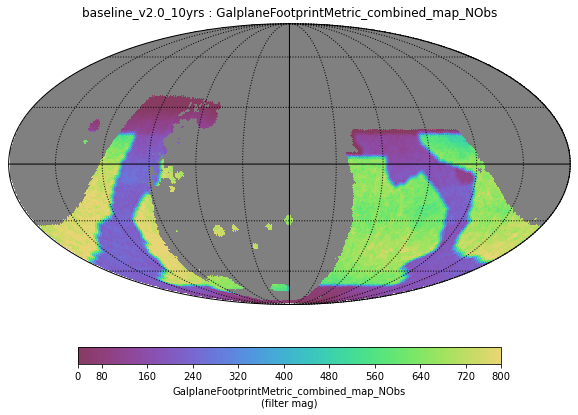

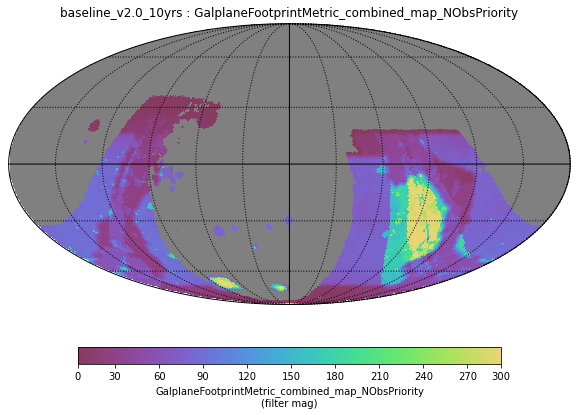

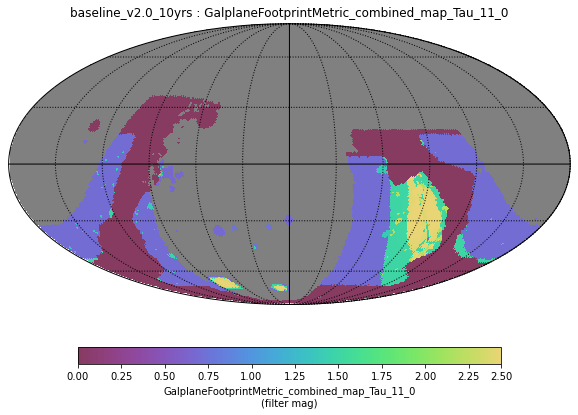

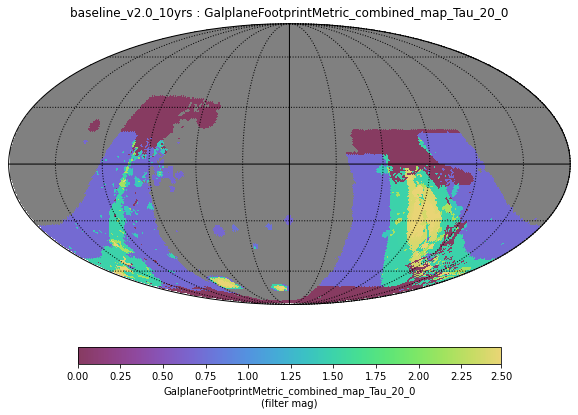

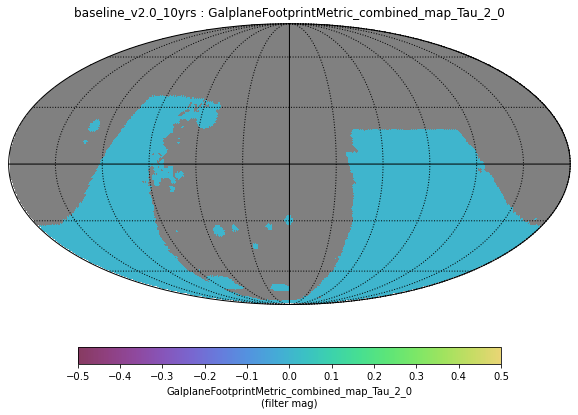

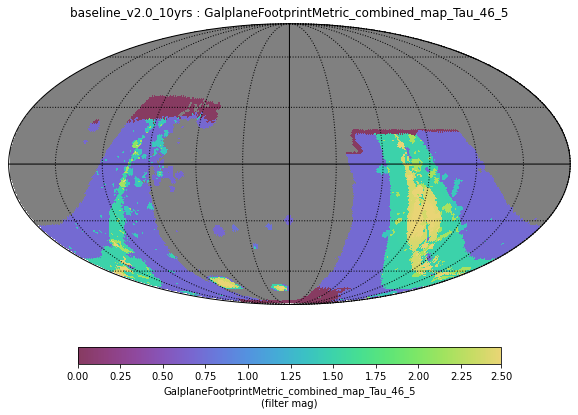

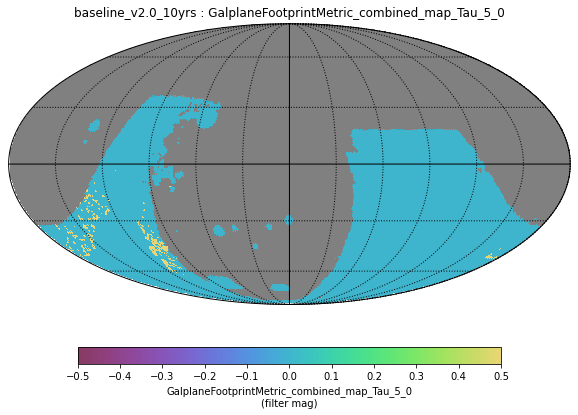

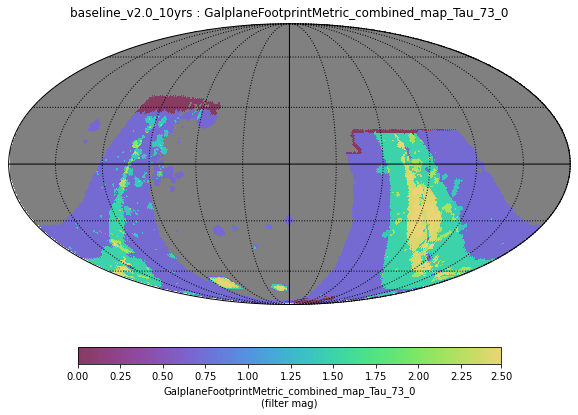

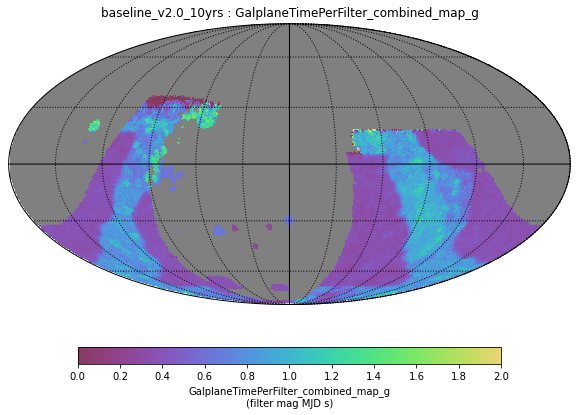

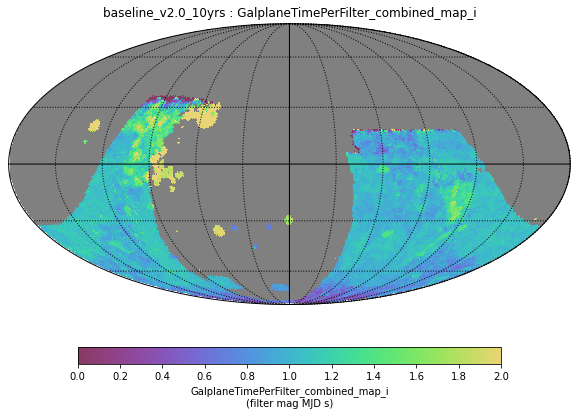

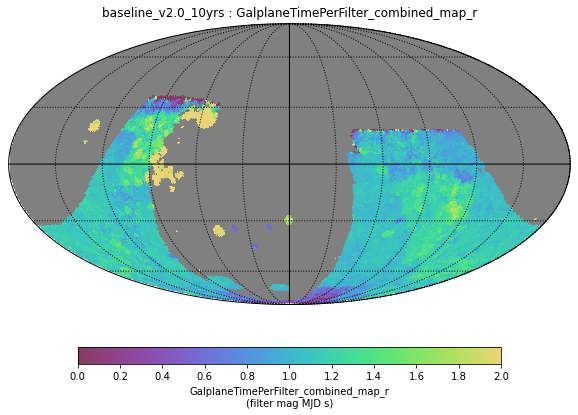

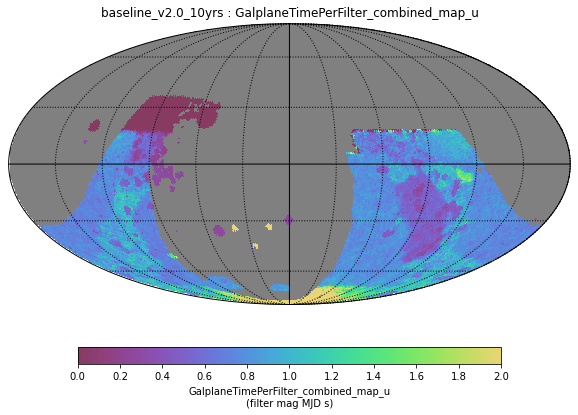

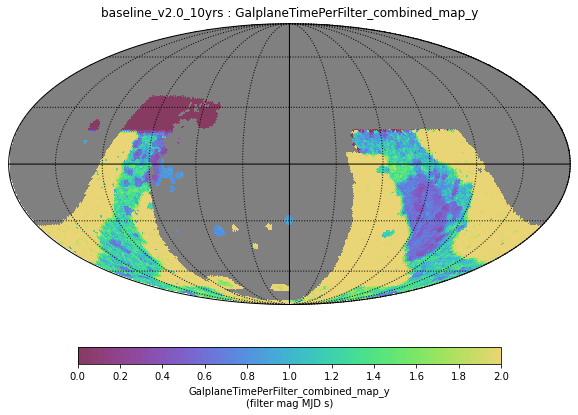

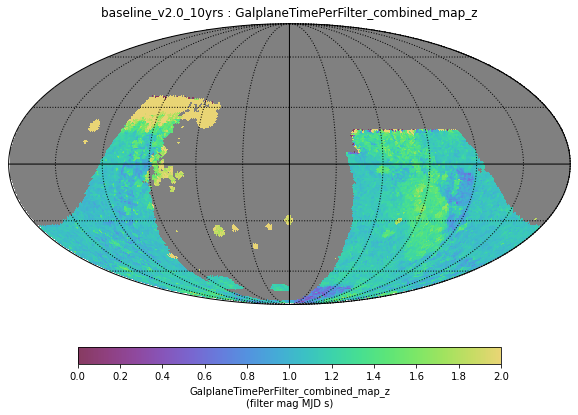

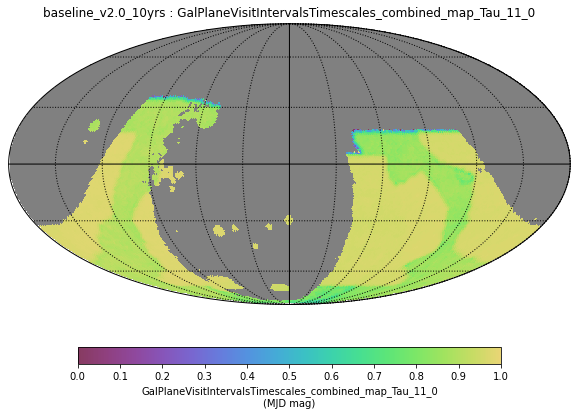

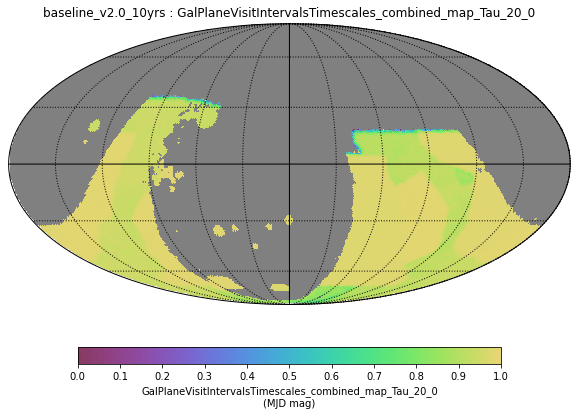

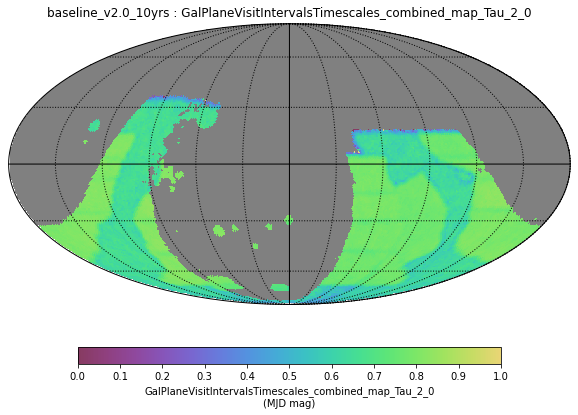

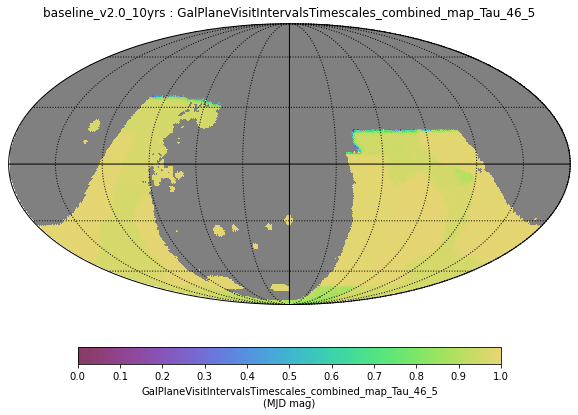

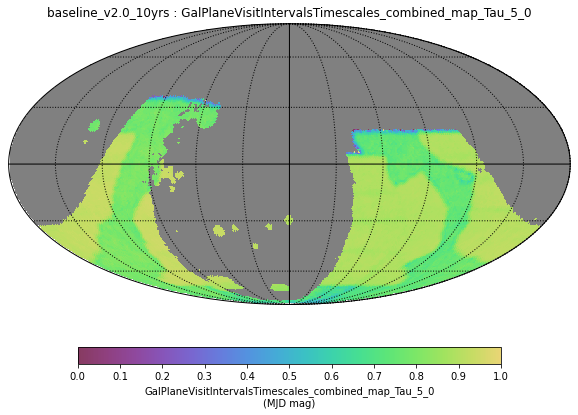

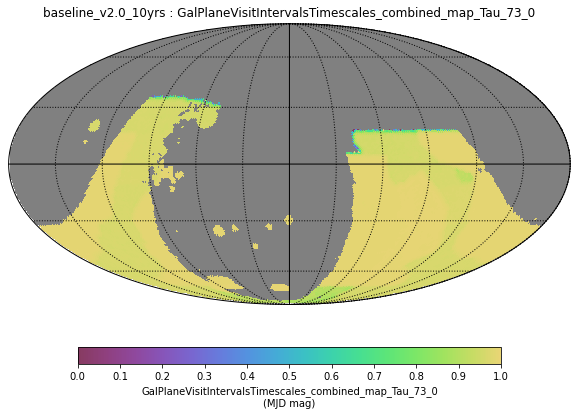

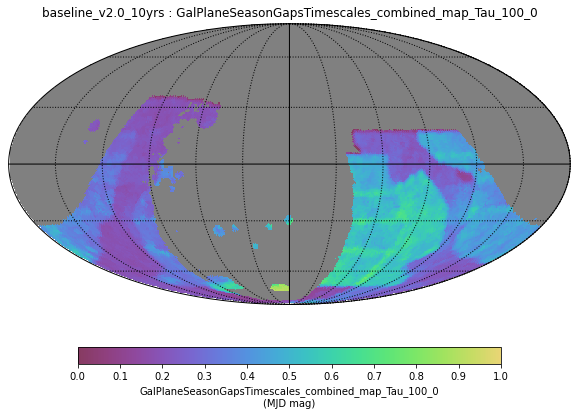

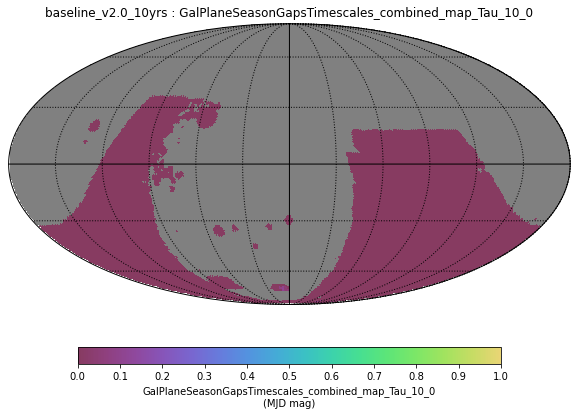

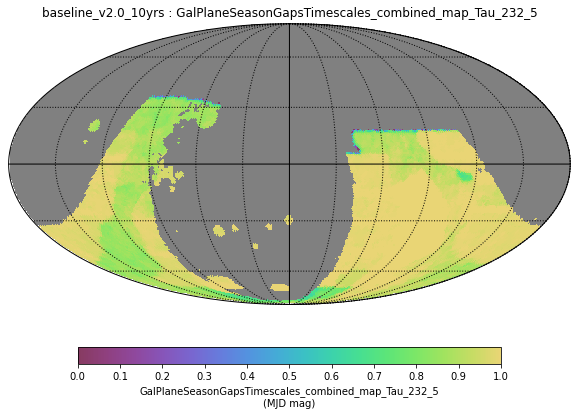

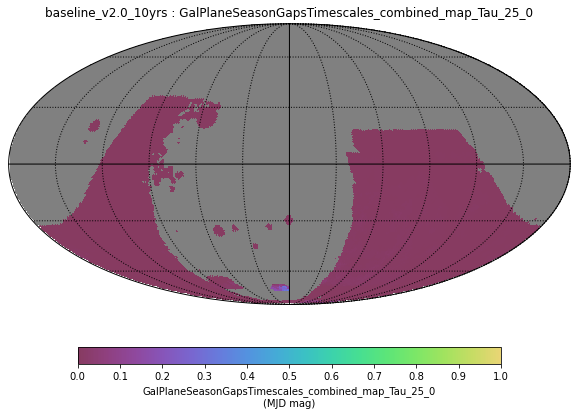

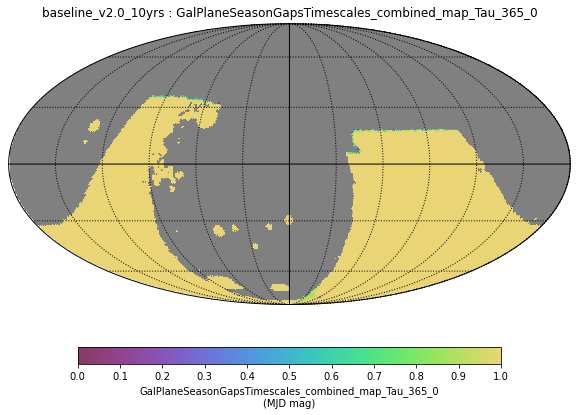

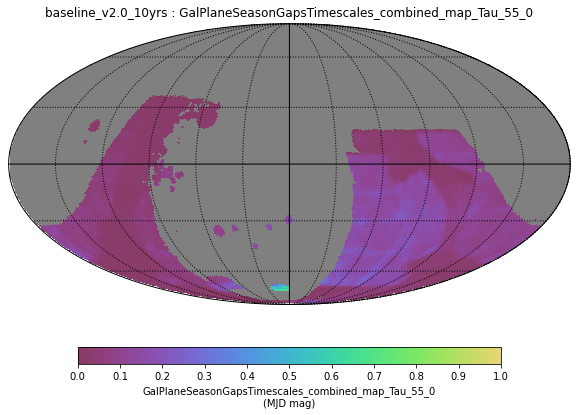

In [13]:
plots = [p for p in bundles.keys() if 'combined_map' in p]
for p in plots:
    plotDict = {'figsize': (8, 6)}
    bundles[p].setPlotDict(plotDict)
    bundles[p].plot(plotFunc=maf.HealpixSkyMap())

/Users/lynnej/other_repos/rachel_rubin_sim/rubin_sim/maf/plots/plotHandler.py:583: UserWarning: Cannot plot object metric values with this plotter.
  warnings.warn(
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
/Users/lynnej/other_repos/rachel_rubin_sim/rubin_sim/maf/plots/spatialPlotters.py:186: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(

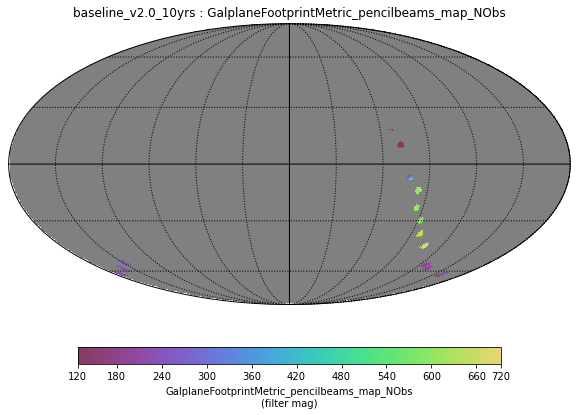

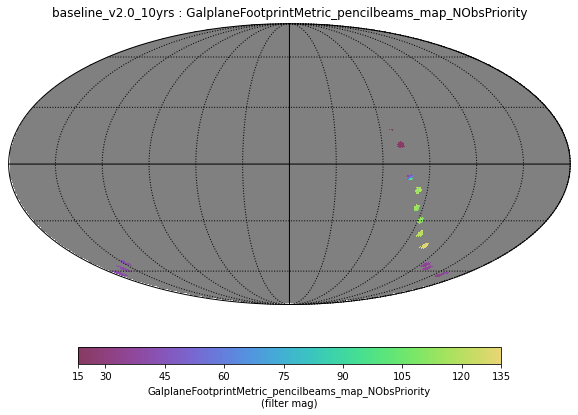

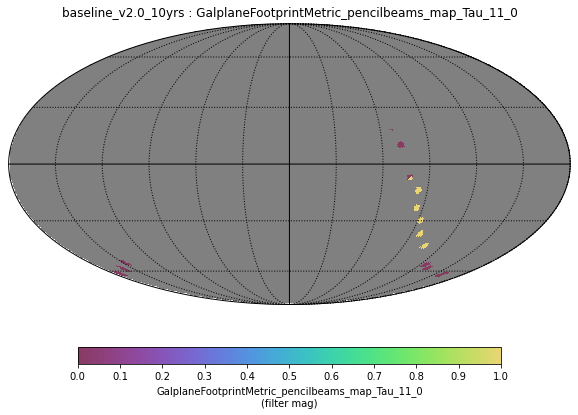

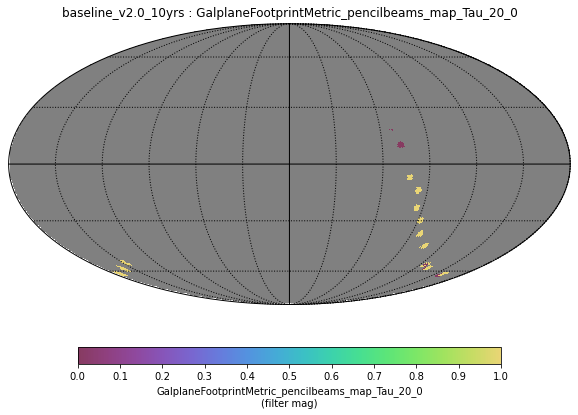

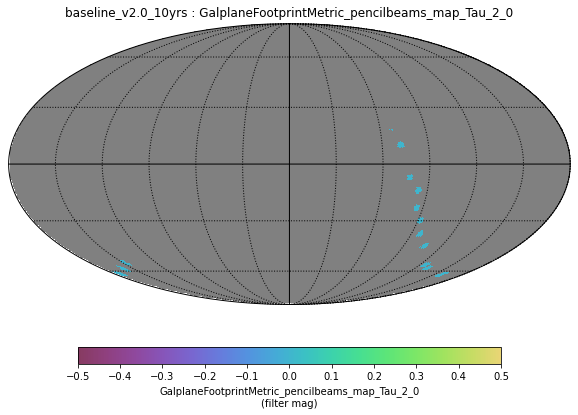

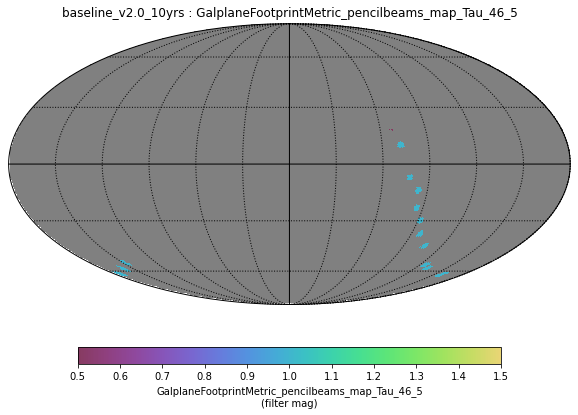

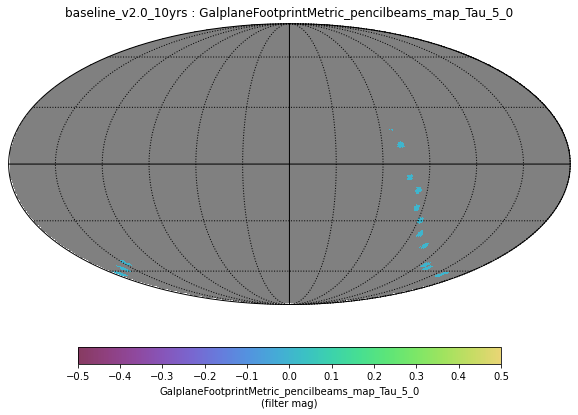

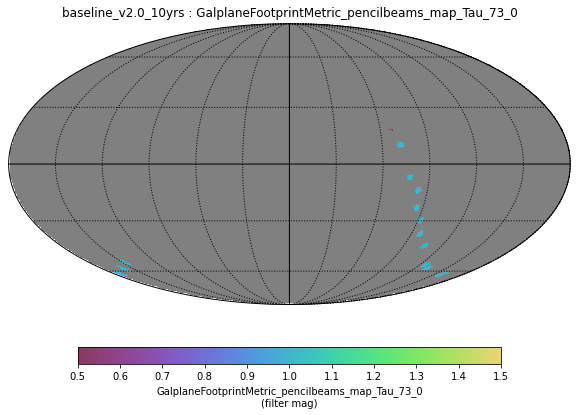

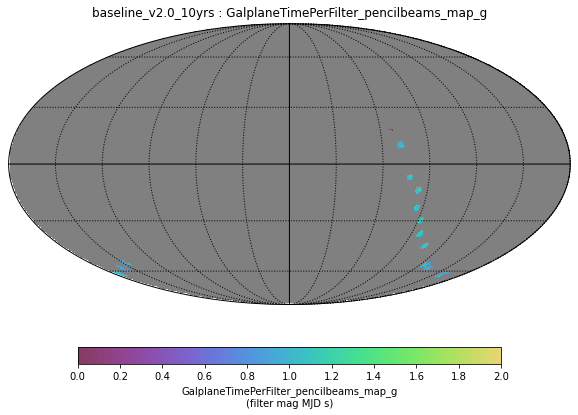

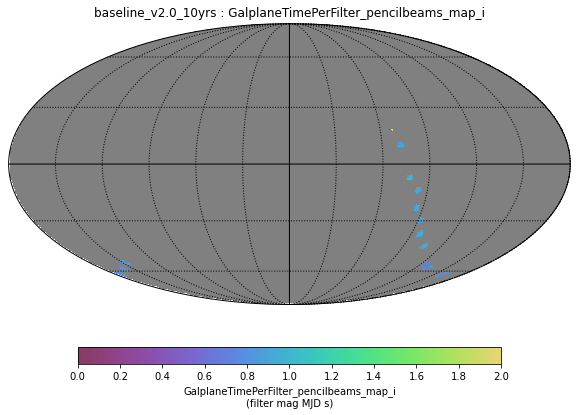

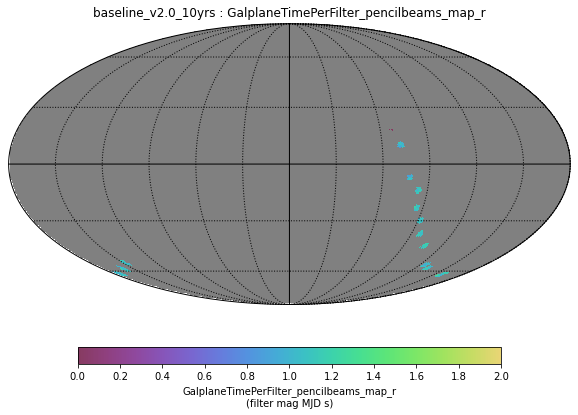

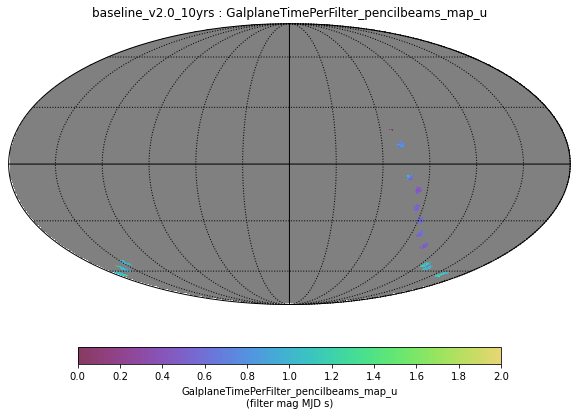

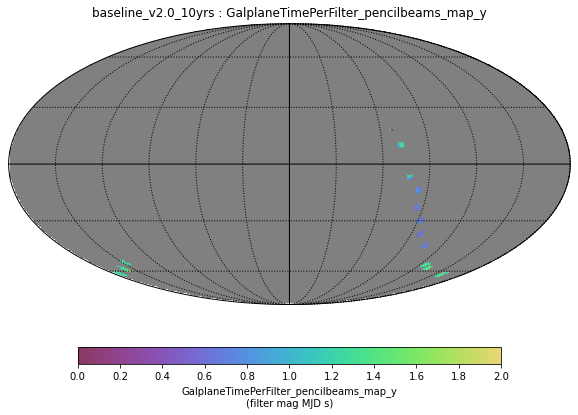

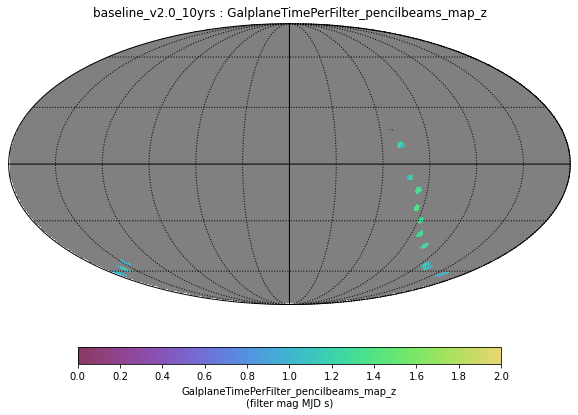

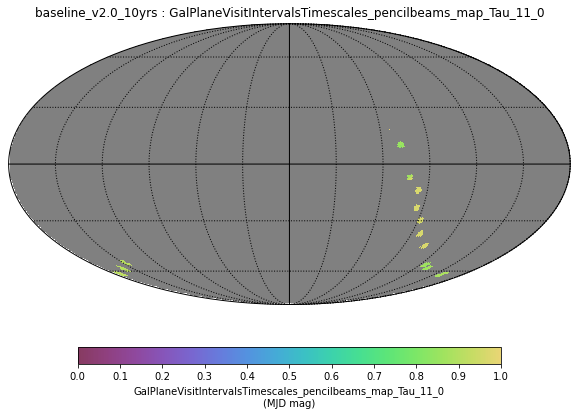

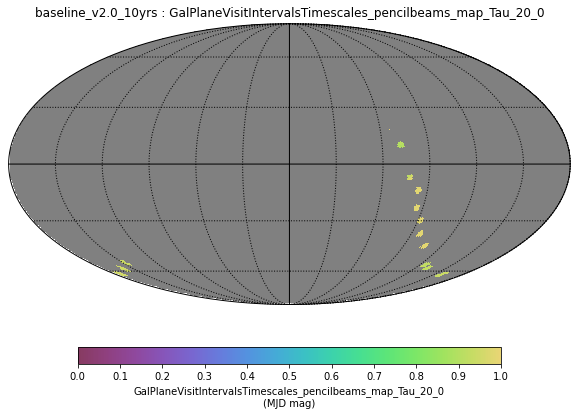

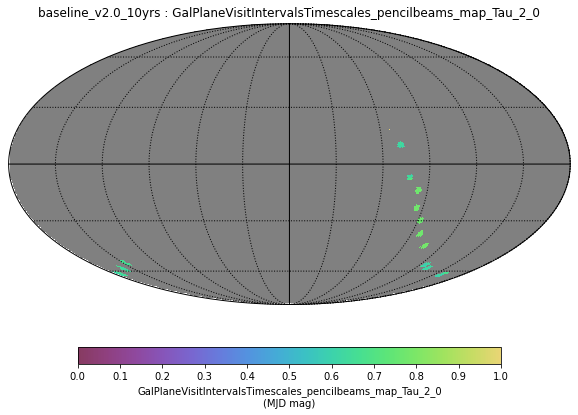

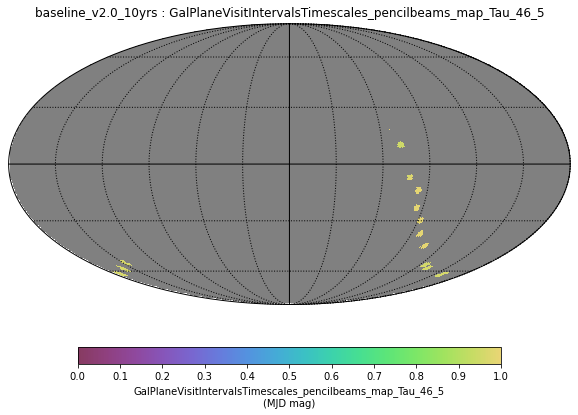

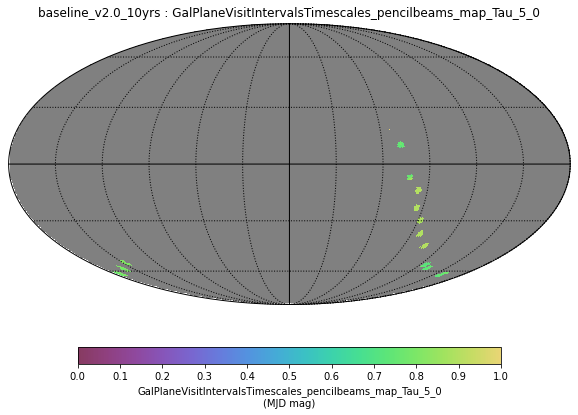

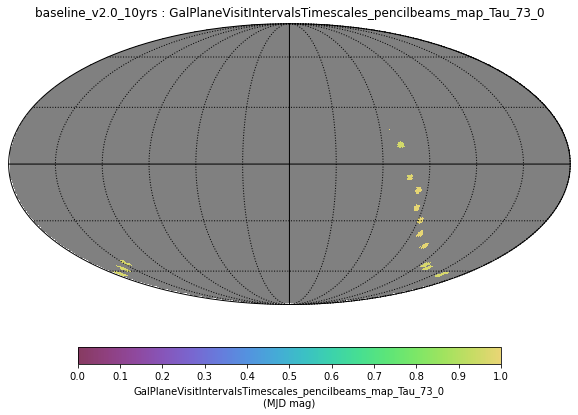

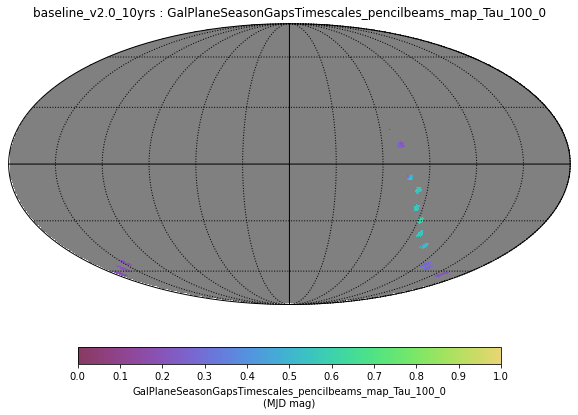

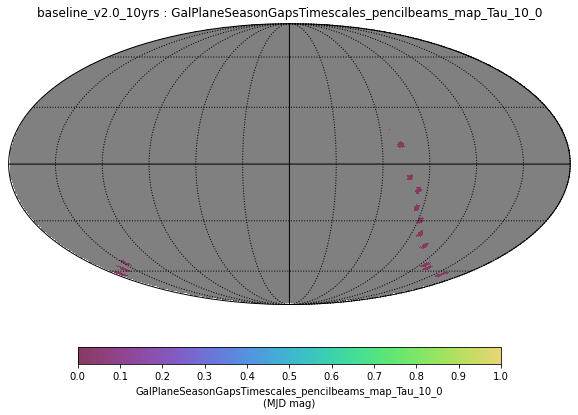

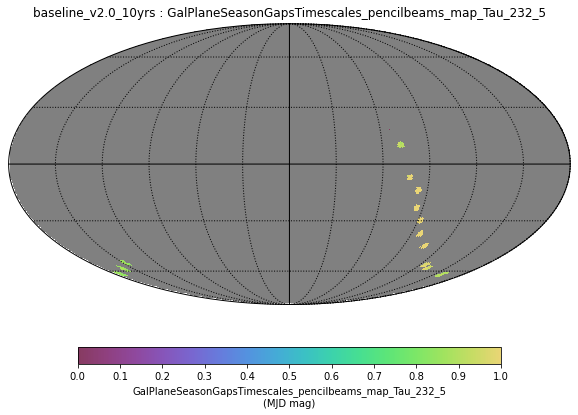

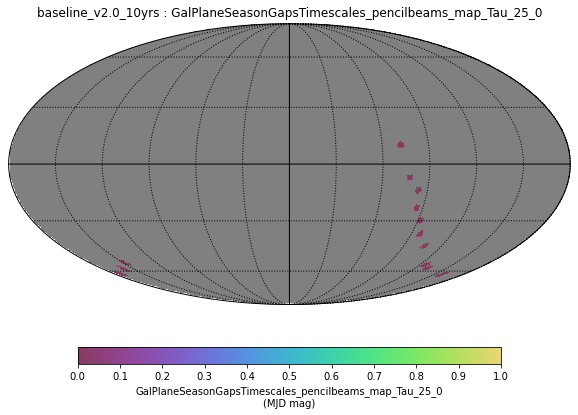

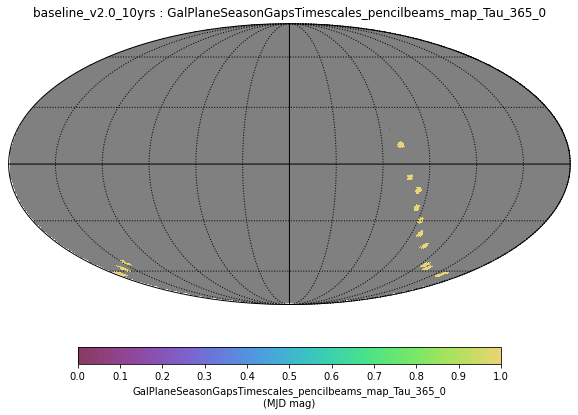

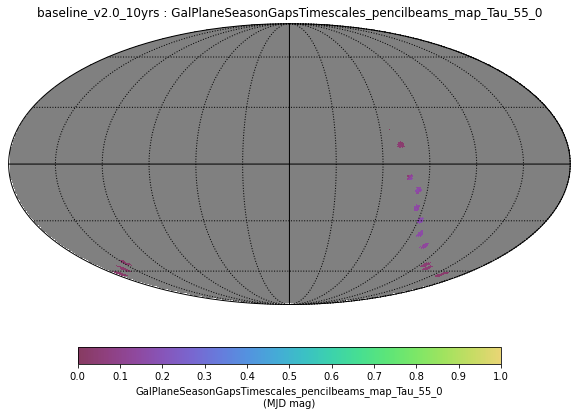

In [23]:
plots = [p for p in bundles.keys() if 'pencilbeams_map' in p]
for p in plots:
    plotDict = {'figsize': (8, 6)}
    bundles[p].setPlotDict(plotDict)
    bundles[p].plot(plotFunc=maf.HealpixSkyMap())

In [34]:
rc = maf.RunComparison(runDirs=[outDir])
mdict = rc.buildMetricDict()
rc.addSummaryStats(mdict)

In [35]:
pd.set_option("display.max_rows", None)
rc.summaryStats.T

run_name                                            baseline_v2.0_10yrs
metric                                                                 
Sum GalplaneFootprintMetric_zucker_sfr_map_NObs...         3.822190e+05
Sum GalplaneFootprintMetric_zucker_sfr_map_NObs...         3.822190e+04
Sum GalplaneFootprintMetric_zucker_sfr_map_Tau_...         1.968000e+02
Sum GalplaneFootprintMetric_zucker_sfr_map_Tau_...         4.896000e+02
Sum GalplaneFootprintMetric_zucker_sfr_map_Tau_...         0.000000e+00
Sum GalplaneFootprintMetric_zucker_sfr_map_Tau_...         6.858000e+02
Sum GalplaneFootprintMetric_zucker_sfr_map_Tau_...         6.000000e-01
Sum GalplaneFootprintMetric_zucker_sfr_map_Tau_...         7.134000e+02
AreaThreshold GalplaneTimePerFilter_zucker_sfr_...         8.250257e+02
Mean GalplaneTimePerFilter_zucker_sfr_map_g  He...         9.793196e-01
Median GalplaneTimePerFilter_zucker_sfr_map_g  ...         1.036649e+00
Rms GalplaneTimePerFilter_zucker_sfr_map_g  Hea...         2.898083e-01
AreaThreshold GalplaneTimePerFilter_zucker_sfr_...         1.002117e+03
Mean GalplaneTimePerFilter_zucker_sfr_map_i  He...         1.198987e+00
Median GalplaneTimePerFilter_zucker_sfr_map_i  ...         1.181027e+00
Rms GalplaneTimePerFilter_zucker_sfr_map_i  Hea...         2.552850e-01
AreaThreshold GalplaneTimePerFilter_zucker_sfr_...         1.025617e+03
Mean GalplaneTimePerFilter_zucker_sfr_map_r  He...         1.262771e+00
Median GalplaneTimePerFilter_zucker_sfr_map_r  ...         1.279811e+00
Rms GalplaneTimePerFilter_zucker_sfr_map_r  Hea...         2.302490e-01
AreaThreshold GalplaneTimePerFilter_zucker_sfr_...         2.350022e+01
Mean GalplaneTimePerFilter_zucker_sfr_map_u  He...         4.202487e-01
Median GalplaneTimePerFilter_zucker_sfr_map_u  ...         4.605423e-01
Rms GalplaneTimePerFilter_zucker_sfr_map_u  Hea...         2.184505e-01
AreaThreshold GalplaneTimePerFilter_zucker_sfr_...         3.550212e+02
Mean GalplaneTimePerFilter_zucker_sfr_map_y  He...         6.798760e-01
Median GalplaneTimePerFilter_zucker_sfr_map_y  ...         7.017132e-01
Rms GalplaneTimePerFilter_zucker_sfr_map_y  Hea...         3.958216e-01
AreaThreshold GalplaneTimePerFilter_zucker_sfr_...         1.047438e+03
Mean GalplaneTimePerFilter_zucker_sfr_map_z  He...         1.449197e+00
Median GalplaneTimePerFilter_zucker_sfr_map_z  ...         1.297869e+00
Rms GalplaneTimePerFilter_zucker_sfr_map_z  Hea...         5.639221e-01
AreaThreshold GalPlaneVisitIntervalsTimescales_...         1.039885e+03
Median GalPlaneVisitIntervalsTimescales_zucker_...         9.009589e-01
Sum GalPlaneVisitIntervalsTimescales_zucker_sfr...         1.122975e+03
AreaThreshold GalPlaneVisitIntervalsTimescales_...         1.043242e+03
Median GalPlaneVisitIntervalsTimescales_zucker_...         9.460390e-01
Sum GalPlaneVisitIntervalsTimescales_zucker_sfr...         1.177145e+03
AreaThreshold GalPlaneVisitIntervalsTimescales_...         1.023938e+03
Median GalPlaneVisitIntervalsTimescales_zucker_...         6.618942e-01
Sum GalPlaneVisitIntervalsTimescales_zucker_sfr...         8.482005e+02
AreaThreshold GalPlaneVisitIntervalsTimescales_...         1.044921e+03
Median GalPlaneVisitIntervalsTimescales_zucker_...         9.645580e-01
Sum GalPlaneVisitIntervalsTimescales_zucker_sfr...         1.202184e+03
AreaThreshold GalPlaneVisitIntervalsTimescales_...         1.034849e+03
Median GalPlaneVisitIntervalsTimescales_zucker_...         7.927532e-01
Sum GalPlaneVisitIntervalsTimescales_zucker_sfr...         1.001918e+03
AreaThreshold GalPlaneVisitIntervalsTimescales_...         1.044921e+03
Median GalPlaneVisitIntervalsTimescales_zucker_...         9.682814e-01
Sum GalPlaneVisitIntervalsTimescales_zucker_sfr...         1.207303e+03
AreaThreshold GalPlaneSeasonGapsTimescales_zuck...         1.460371e+02
Median GalPlaneSeasonGapsTimescales_zucker_sfr_...         2.416567e-01
Sum GalPlaneSeasonGapsTimescales_zucker_sfr_map...         3.754712e+02
AreaThreshold GalPlaneSeasonGapsTimescal

In [16]:
# Read in the summary stats from some other directories of interest (with the same contents)
dirs = [d for d in os.listdir('.') if 'galplane' in d]

rc = maf.RunComparison(runDirs=dirs)
rc.addSummaryStats()
rc.summaryStats.T[0:10]

run_name                                            baseline_v2.0_10yrs  \
metric                                                                    
Sum GalplaneFootprintMetric_xrb_priority_map_NO...                  NaN   
Sum GalplaneFootprintMetric_xrb_priority_map_NO...                  NaN   
Sum GalplaneFootprintMetric_xrb_priority_map_Ta...                  NaN   
Sum GalplaneFootprintMetric_xrb_priority_map_Ta...                  NaN   
Sum GalplaneFootprintMetric_xrb_priority_map_Ta...                  NaN   
Sum GalplaneFootprintMetric_xrb_priority_map_Ta...                  NaN   
Sum GalplaneFootprintMetric_xrb_priority_map_Ta...                  NaN   
Sum GalplaneFootprintMetric_xrb_priority_map_Ta...                  NaN   
Mean GalplaneTimePerFilter_xrb_priority_map_g  ...                  NaN   
Median GalplaneTimePerFilter_xrb_priority_map_g...                  NaN   

run_name                                            vary_gp_gpfrac0.01_v2.0_10yrs  \
metric                                                                              
Sum GalplaneFootprintMetric_xrb_priority_map_NO...                   1.833242e+07   
Sum GalplaneFootprintMetric_xrb_priority_map_NO...                   1.061204e+02   
Sum GalplaneFootprintMetric_xrb_priority_map_Ta...                   7.891305e-01   
Sum GalplaneFootprintMetric_xrb_priority_map_Ta...                   8.182037e-01   
Sum GalplaneFootprintMetric_xrb_priority_map_Ta...                   6.257374e-05   
Sum GalplaneFootprintMetric_xrb_priority_map_Ta...                   9.160755e-01   
Sum GalplaneFootprintMetric_xrb_priority_map_Ta...                   3.035320e-03   
Sum GalplaneFootprintMetric_xrb_priority_map_Ta...                   9.208637e-01   
Mean GalplaneTimePerFilter_xrb_priority_map_g  ...                   3.805383e+00   
Median GalplaneTimePerFilter_xrb_priority_map_g...                   4.635688e-01   

run_name                                            vary_gp_gpfrac0.05_v2.0_10yrs  \
metric                                                                              
Sum GalplaneFootprintMetric_xrb_priority_map_NO...                   1.835141e+07   
Sum GalplaneFootprintMetric_xrb_priority_map_NO...                   1.095895e+02   
Sum GalplaneFootprintMetric_xrb_priority_map_Ta...                   7.901847e-01   
Sum GalplaneFootprintMetric_xrb_priority_map_Ta...                   8.191334e-01   
Sum GalplaneFootprintMetric_xrb_priority_map_Ta...                   6.257374e-05   
Sum GalplaneFootprintMetric_xrb_priority_map_Ta...                   9.168314e-01   
Sum GalplaneFootprintMetric_xrb_priority_map_Ta...                   2.929671e-03   
Sum GalplaneFootprintMetric_xrb_priority_map_Ta...                   9.289042e-01   
Mean GalplaneTimePerFilter_xrb_priority_map_g  ...                   3.852042e+00   
Median GalplaneTimePerFilter_xrb_priority_map_g...                   4.657546e-01   

run_name                                            vary_gp_gpfrac0.10_v2.0_10yrs  \
metric                                                                              
Sum GalplaneFootprintMetric_xrb_priority_map_NO...                   1.834127e+07   
Sum GalplaneFootprintMetric_xrb_priority_map_NO...                   1.092198e+02   
Sum GalplaneFootprintMetric_xrb_priority_map_Ta...                   7.897988e-01   
Sum GalplaneFootprintMetric_xrb_priority_map_Ta...                   8.194211e-01   
Sum GalplaneFootprintMetric_xrb_priority_map_Ta...                   6.257374e-05   
Sum GalplaneFootprintMetric_xrb_priority_map_Ta...                   9.212011e-01   
Sum GalplaneFootprintMetric_xrb_priority_map_Ta...                   2.540390e-03   
Sum GalplaneFootprintMetric_xrb_priority_map_Ta...                   9.398768e-01   
Mean GalplaneTimePerFilter_xrb_priority_map_g  ...                   3.844055e+00   
Median GalplaneTimePerFilter_xrb_priority_map_g...                   4.712782e-01   

run_name                            

In [17]:
rc.summaryStats.to_csv('galactic_plane_summary_stats.csv')

In [18]:
# Use some of the tools in the maf.RunComparison module to help compare outputs from these multiple runs
family_runs = maf.archive.get_family_runs()
# family_runs.loc['vary_gp']
these_runs = list(family_runs.loc['vary_gp'].run.values)
these_runs += ['baseline_v2.0_10yrs']
these_runs

['vary_gp_gpfrac0.01_v2.0_10yrs',
 'vary_gp_gpfrac0.05_v2.0_10yrs',
 'vary_gp_gpfrac0.10_v2.0_10yrs',
 'vary_gp_gpfrac0.15_v2.0_10yrs',
 'vary_gp_gpfrac0.20_v2.0_10yrs',
 'vary_gp_gpfrac0.25_v2.0_10yrs',
 'vary_gp_gpfrac0.30_v2.0_10yrs',
 'vary_gp_gpfrac0.35_v2.0_10yrs',
 'vary_gp_gpfrac0.40_v2.0_10yrs',
 'vary_gp_gpfrac0.45_v2.0_10yrs',
 'vary_gp_gpfrac0.50_v2.0_10yrs',
 'vary_gp_gpfrac0.55_v2.0_10yrs',
 'vary_gp_gpfrac0.75_v2.0_10yrs',
 'vary_gp_gpfrac1.00_v2.0_10yrs',
 'baseline_v2.0_10yrs']

In [19]:
summaries = maf.archive.get_metric_summaries(summary_source='galactic_plane_summary_stats.csv')
# Sort the summaries in the order above -- 
# this should make trends with 'time spent on galactic plane' easier to see
summaries = summaries.loc[these_runs]
summaries

metric                         Sum GalplaneFootprintMetric_xrb_priority_map_NObs  HealpixSlicer  \
run                                                                                               
vary_gp_gpfrac0.01_v2.0_10yrs                                         18332415.0                  
vary_gp_gpfrac0.05_v2.0_10yrs                                         18351414.0                  
vary_gp_gpfrac0.10_v2.0_10yrs                                         18341271.0                  
vary_gp_gpfrac0.15_v2.0_10yrs                                         18345253.0                  
vary_gp_gpfrac0.20_v2.0_10yrs                                         18375257.0                  
vary_gp_gpfrac0.25_v2.0_10yrs                                         18334237.0                  
vary_gp_gpfrac0.30_v2.0_10yrs                                         18371035.0                  
vary_gp_gpfrac0.35_v2.0_10yrs                                         18377961.0                  
vary_gp_gpfrac0.40_v2.0_10yrs                                         18385990.0                  
vary_gp_gpfrac0.45_v2.0_10yrs                                         18371443.0                  
vary_gp_gpfrac0.50_v2.0_10yrs                                         18394632.0                  
vary_gp_gpfrac0.55_v2.0_10yrs                                         18392677.0                  
vary_gp_gpfrac0.75_v2.0_10yrs                                         18350516.0                  
vary_gp_gpfrac1.00_v2.0_10yrs                                         18349953.0                  
baseline_v2.0_10yrs                                                          NaN                  

metric                         Sum GalplaneFootprintMetric_xrb_priority_map_NObsPriority  HealpixSlicer  \
run                                                                                                       
vary_gp_gpfrac0.01_v2.0_10yrs                                         106.120384                          
vary_gp_gpfrac0.05_v2.0_10yrs                                         109.589537                          
vary_gp_gpfrac0.10_v2.0_10yrs                                         109.219752                          
vary_gp_gpfrac0.15_v2.0_10yrs                                         111.088759                          
vary_gp_gpfrac0.20_v2.0_10yrs                                         109.030829                          
vary_gp_gpfrac0.25_v2.0_10yrs                                         109.436783                          
vary_gp_gpfrac0.30_v2.0_10yrs                                         107.676966                          
vary_gp_gpfrac0.35_v2.0_10yrs                                         104.823355                          
vary_gp_gpfrac0.40_v2.0_10yrs                                         108.080561                          
vary_gp_gpfrac0.45_v2.0_10yrs                                         108.752168                          
vary_gp_gpfrac0.50_v2.0_10yrs                                         106.282250                          
vary_gp_gpfrac0.55_v2.0_10yrs                                         108.717975                          
vary_gp_gpfrac0.75_v2.0_10yrs                                         107.501188                          
vary_gp_gpfrac1.00_v2.0_10yrs                                         105.701687                          
baseline_v2.0_10yrs                                                          NaN                          

metric                         Sum GalplaneFootprintMetric_xrb_priority_map_Tau_11_0  HealpixSlicer  \
run                                                                                                   
vary_gp_gpfrac0.01_v2.0_10yrs                                           0.789131                      
vary_gp_gpfrac0.05_v2.0_10yrs                                           0.790185                      
vary_gp_gpfrac0.10_v2.0_10yrs                                           0.789799    

In [20]:
# Identify some subsets of these metrics to make better visualizations
tau_obs = np.array([2.0, 5.0, 11.0, 46.5, 73])
tau_seasons = tau_obs * 5
tau_names = [f'Tau_{tau:.1f}'.replace('.', '_') for tau in tau_obs]
tau_season_names = [f'Tau_{tau:.1f}'.replace('.', '_') for tau in tau_seasons]
filterlist = ('u', 'g', 'r', 'i', 'z', 'y')
metricnames = {}
for tau, tau_name in zip(tau_obs, tau_names):
    metricnames[f'footprint {tau}'] = [m for m in summaries.columns if 'Footprint' in m and tau_name in m]
    metricnames[f'sum visit intervals {tau}'] = [m for m in summaries.columns 
                                                 if 'VisitIntervals' in m and tau_name in m and 'Sum' in m]
    metricnames[f'area visit intervals {tau}'] = [m for m in summaries.columns 
                                                 if 'VisitIntervals' in m and tau_name in m and 'Area' in m]
    metricnames[f'median visit intervals {tau}'] = [m for m in summaries.columns 
                                                 if 'VisitIntervals' in m and tau_name in m and 'Median' in m]
for tau, tau_name in zip(tau_seasons, tau_season_names):
    metricnames[f'sum season gaps {tau}'] = [m for m in summaries.columns 
                                                 if 'SeasonGaps' in m and tau_name in m and 'Sum' in m]
    metricnames[f'area season gaps {tau}'] = [m for m in summaries.columns 
                                                 if 'SeasonGaps' in m and tau_name in m and 'Area' in m]
    metricnames[f'median season gaps {tau}'] = [m for m in summaries.columns 
                                                 if 'SeasonGaps' in m and tau_name in m and 'Median' in m]
for f in filterlist:
    metricnames[f'area filter {f}'] = [m for m in summaries.columns 
                                       if 'Filter' in m and f"_{f}  HealpixSlicer"  in m and "Area" in m]
    metricnames[f'mean filter {f}'] = [m for m in summaries.columns 
                                       if 'Filter' in m and f"_{f}  HealpixSlicer" in m and 'Mean' in m]
    metricnames[f'rms filter {f}'] = [m for m in summaries.columns 
                                      if 'Filter' in m and f"_{f}  HealpixSlicer"  in m and 'Rms' in m]
for k in metricnames:
    print(k, len(metricnames[k]))

footprint 2.0 12
sum visit intervals 2.0 12
area visit intervals 2.0 12
median visit intervals 2.0 12
footprint 5.0 12
sum visit intervals 5.0 12
area visit intervals 5.0 12
median visit intervals 5.0 12
footprint 11.0 12
sum visit intervals 11.0 12
area visit intervals 11.0 12
median visit intervals 11.0 12
footprint 46.5 12
sum visit intervals 46.5 12
area visit intervals 46.5 12
median visit intervals 46.5 12
footprint 73.0 12
sum visit intervals 73.0 12
area visit intervals 73.0 12
median visit intervals 73.0 12
sum season gaps 10.0 12
area season gaps 10.0 12
median season gaps 10.0 12
sum season gaps 25.0 12
area season gaps 25.0 12
median season gaps 25.0 12
sum season gaps 55.0 12
area season gaps 55.0 12
median season gaps 55.0 12
sum season gaps 232.5 12
area season gaps 232.5 12
median season gaps 232.5 12
sum season gaps 365.0 12
area season gaps 365.0 12
median season gaps 365.0 12
area filter u 12
mean filter u 12
rms filter u 12
area filter g 12
mean filter g 12
rms filt

In [21]:
# Normalize data frame by baseline -- the methods in archive and summary_plots can help with this
df = summaries / summaries.loc['baseline_v2.0_10yrs']
df[-4:]

metric                         Sum GalplaneFootprintMetric_xrb_priority_map_NObs  HealpixSlicer  \
run                                                                                               
vary_gp_gpfrac0.55_v2.0_10yrs                                                NaN                  
vary_gp_gpfrac0.75_v2.0_10yrs                                                NaN                  
vary_gp_gpfrac1.00_v2.0_10yrs                                                NaN                  
baseline_v2.0_10yrs                                                          NaN                  

metric                         Sum GalplaneFootprintMetric_xrb_priority_map_NObsPriority  HealpixSlicer  \
run                                                                                                       
vary_gp_gpfrac0.55_v2.0_10yrs                                                NaN                          
vary_gp_gpfrac0.75_v2.0_10yrs                                                NaN                          
vary_gp_gpfrac1.00_v2.0_10yrs                                                NaN                          
baseline_v2.0_10yrs                                                          NaN                          

metric                         Sum GalplaneFootprintMetric_xrb_priority_map_Tau_11_0  HealpixSlicer  \
run                                                                                                   
vary_gp_gpfrac0.55_v2.0_10yrs                                                NaN                      
vary_gp_gpfrac0.75_v2.0_10yrs                                                NaN                      
vary_gp_gpfrac1.00_v2.0_10yrs                                                NaN                      
baseline_v2.0_10yrs                                                          NaN                      

metric                         Sum GalplaneFootprintMetric_xrb_priority_map_Tau_20_0  HealpixSlicer  \
run                                                                                                   
vary_gp_gpfrac0.55_v2.0_10yrs                                                NaN                      
vary_gp_gpfrac0.75_v2.0_10yrs                                                NaN                      
vary_gp_gpfrac1.00_v2.0_10yrs                                                NaN                      
baseline_v2.0_10yrs                                                          NaN                      

metric                         Sum GalplaneFootprintMetric_xrb_priority_map_Tau_2_0  HealpixSlicer  \
run                                                                                                  
vary_gp_gpfrac0.55_v2.0_10yrs                                                NaN                     
vary_gp_gpfrac0.75_v2.0_10yrs                                                NaN                     
vary_gp_gpfrac1.00_v2.0_10yrs                                                NaN                     
baseline_v2.0_10yrs                                                          NaN                     

metric                         Sum GalplaneFootprintMetric_xrb_priority_map_Tau_46_5  HealpixSlicer  \
run                                                                                                   
vary_gp_gpfrac0.55_v2.0_10yrs                                                NaN                      
vary_gp_gpfrac0.75_v2.0_10yrs                                                NaN                      
vary_gp_gpfrac1.00_v2.0_10yrs                                                NaN                      
baseline_v2.0_10yrs                                                          NaN                      

metric                         Sum GalplaneFootprintMetric_xrb_priority_map_Tau_5_0  HealpixSlicer  \
run                                                                                                  
vary_gp_gpfrac0.55_v2.0_10yrs                                                NaN        

ValueError: Unrecognized character a in format string

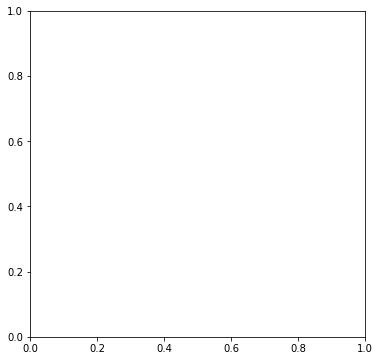

In [22]:
# Note - some of these plots show fewer than the full number of maps; this is happening because sometimes
# the *baseline* run (baseline_v2.0_10yrs) is 0 for that metric .. so the entire column become NaN
cols = [k for k in metricnames if k.startswith('footprint')]
x = np.arange(0, len(these_runs), 1)
for k in cols:
    maf.plot_run_metric(df[metricnames[k]])

In [ ]:
# Note - some of these plots show fewer than the full number of maps; this is happening because sometimes
# the *baseline* run (baseline_v2.0_10yrs) is 0 for that metric .. so the entire column become NaN
# --- see, here I plotted the non-normalized version (some maps just have much higher values)
cols = [k for k in metricnames if k.startswith('footprint')]
x = np.arange(0, len(these_runs), 1)
for k in cols:
    maf.plot_run_metric(summaries[metricnames[k]])

In [ ]:
cols = [k for k in metricnames if k.startswith('area filter')]
x = np.arange(0, len(these_runs), 1)
for k in cols:
    maf.plot_run_metric(df[metricnames[k]])

In [ ]:
cols = [k for k in metricnames if k.startswith('mean filter')]
x = np.arange(0, len(these_runs), 1)
for k in cols:
    maf.plot_run_metric(df[metricnames[k]])

In [ ]:
cols = [k for k in metricnames if k.startswith('rms filter')]
x = np.arange(0, len(these_runs), 1)
for k in cols:
    maf.plot_run_metric(df[metricnames[k]])

In [ ]:
cols = [k for k in metricnames if k.startswith('sum visit')]
x = np.arange(0, len(these_runs), 1)
for k in cols:
    maf.plot_run_metric(df[metricnames[k]])

In [ ]:
cols = [k for k in metricnames if k.startswith('area visit')]
x = np.arange(0, len(these_runs), 1)
for k in cols:
    maf.plot_run_metric(df[metricnames[k]])

In [ ]:
cols = [k for k in metricnames if k.startswith('sum season')]
x = np.arange(0, len(these_runs), 1)
for k in cols:
    maf.plot_run_metric(df[metricnames[k]])

In [ ]:
cols = [k for k in metricnames if k.startswith('area season')]
x = np.arange(0, len(these_runs), 1)
for k in cols[2:]:
    maf.plot_run_metric(df[metricnames[k]])

In [ ]:
cols = [k for k in metricnames if k.startswith('area season')]
x = np.arange(0, len(these_runs), 1)
for k in cols:
    maf.plot_run_metric(summaries[metricnames[k]])